In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# meta.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('meta.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'meta.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 549 rows and 56 columns


In [16]:
df1.head(5)

,patient,record_id,fs,sig_len,n_sig,base_date,base_time,units,sig_name,age,...,Therapy,Infarction_date,Admission_date,Medication_pre_admission,Start_lysis_therapy_(hh.mm),Lytic_agent,Dosage_(lytic_agent),Additional_medication,In_hospital_medication,Medication_after_discharge
0,patient001,s0010_re,1000,38400,15,NaN,NaN,"['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV...","['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', ...",81.0,...,NaN,29-Sep-90,29-Sep-90,Isosorbit-Dinitrate Digoxin Glibenclamide,19,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...
1,patient001,s0014lre,1000,115200,15,NaN,NaN,"['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV...","['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', ...",81.0,...,NaN,29-Sep-90,29-Sep-90,Isosorbit-Dinitrate Digoxin Glibenclamide,19,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...
2,patient001,s0016lre,1000,115200,15,NaN,NaN,"['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV...","['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', ...",81.0,...,NaN,29-Sep-90,29-Sep-90,Isosorbit-Dinitrate Digoxin Glibenclamide,19,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...
3,patient002,s0015lre,1000,115200,15,NaN,NaN,"['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV...","['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', ...",58.0,...,NaN,08-Oct-90,08-Oct-90,Ca-antagonist Estriol,08,Streptokinase,1.5 Mio IE,Nitrate Heparin Ca-antagonist Atropin Ranitidin,ASA Isosorbit-Mononitrate Ca-antagonist Ca-ant...,ASA Bisoprolol Ofloxazin
4,patient003,s0017lre,1000,115200,15,NaN,NaN,"['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV...","['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', ...",63.0,...,NaN,02-Oct-90,02-Oct-90,-,NaN,Gamma-TPA,30 mg,Furosemide,ASA Isosorbit-Mononitrate,ASA Isosorbit-Mononitrate


In [7]:
df1.info

<bound method DataFrame.info of         patient record_id    fs  sig_len  n_sig  base_date  base_time  \
0    patient001  s0010_re  1000    38400     15        NaN        NaN   
1    patient001  s0014lre  1000   115200     15        NaN        NaN   
2    patient001  s0016lre  1000   115200     15        NaN        NaN   
3    patient002  s0015lre  1000   115200     15        NaN        NaN   
4    patient003  s0017lre  1000   115200     15        NaN        NaN   
..          ...       ...   ...      ...    ...        ...        ...   
544  patient292  s0555_re  1000   120012     15        NaN        NaN   
545  patient292  s0556_re  1000   120012     15        NaN        NaN   
546  patient293  s0557_re  1000   120012     15        NaN        NaN   
547  patient293  s0558_re  1000   120012     15        NaN        NaN   
548  patient294  s0559_re  1000   120012     15        NaN        NaN   

                                                 units  \
0    ['mV', 'mV', 'mV', 'mV', 'mV

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_16396/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_16396/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_16396/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_16396/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated si

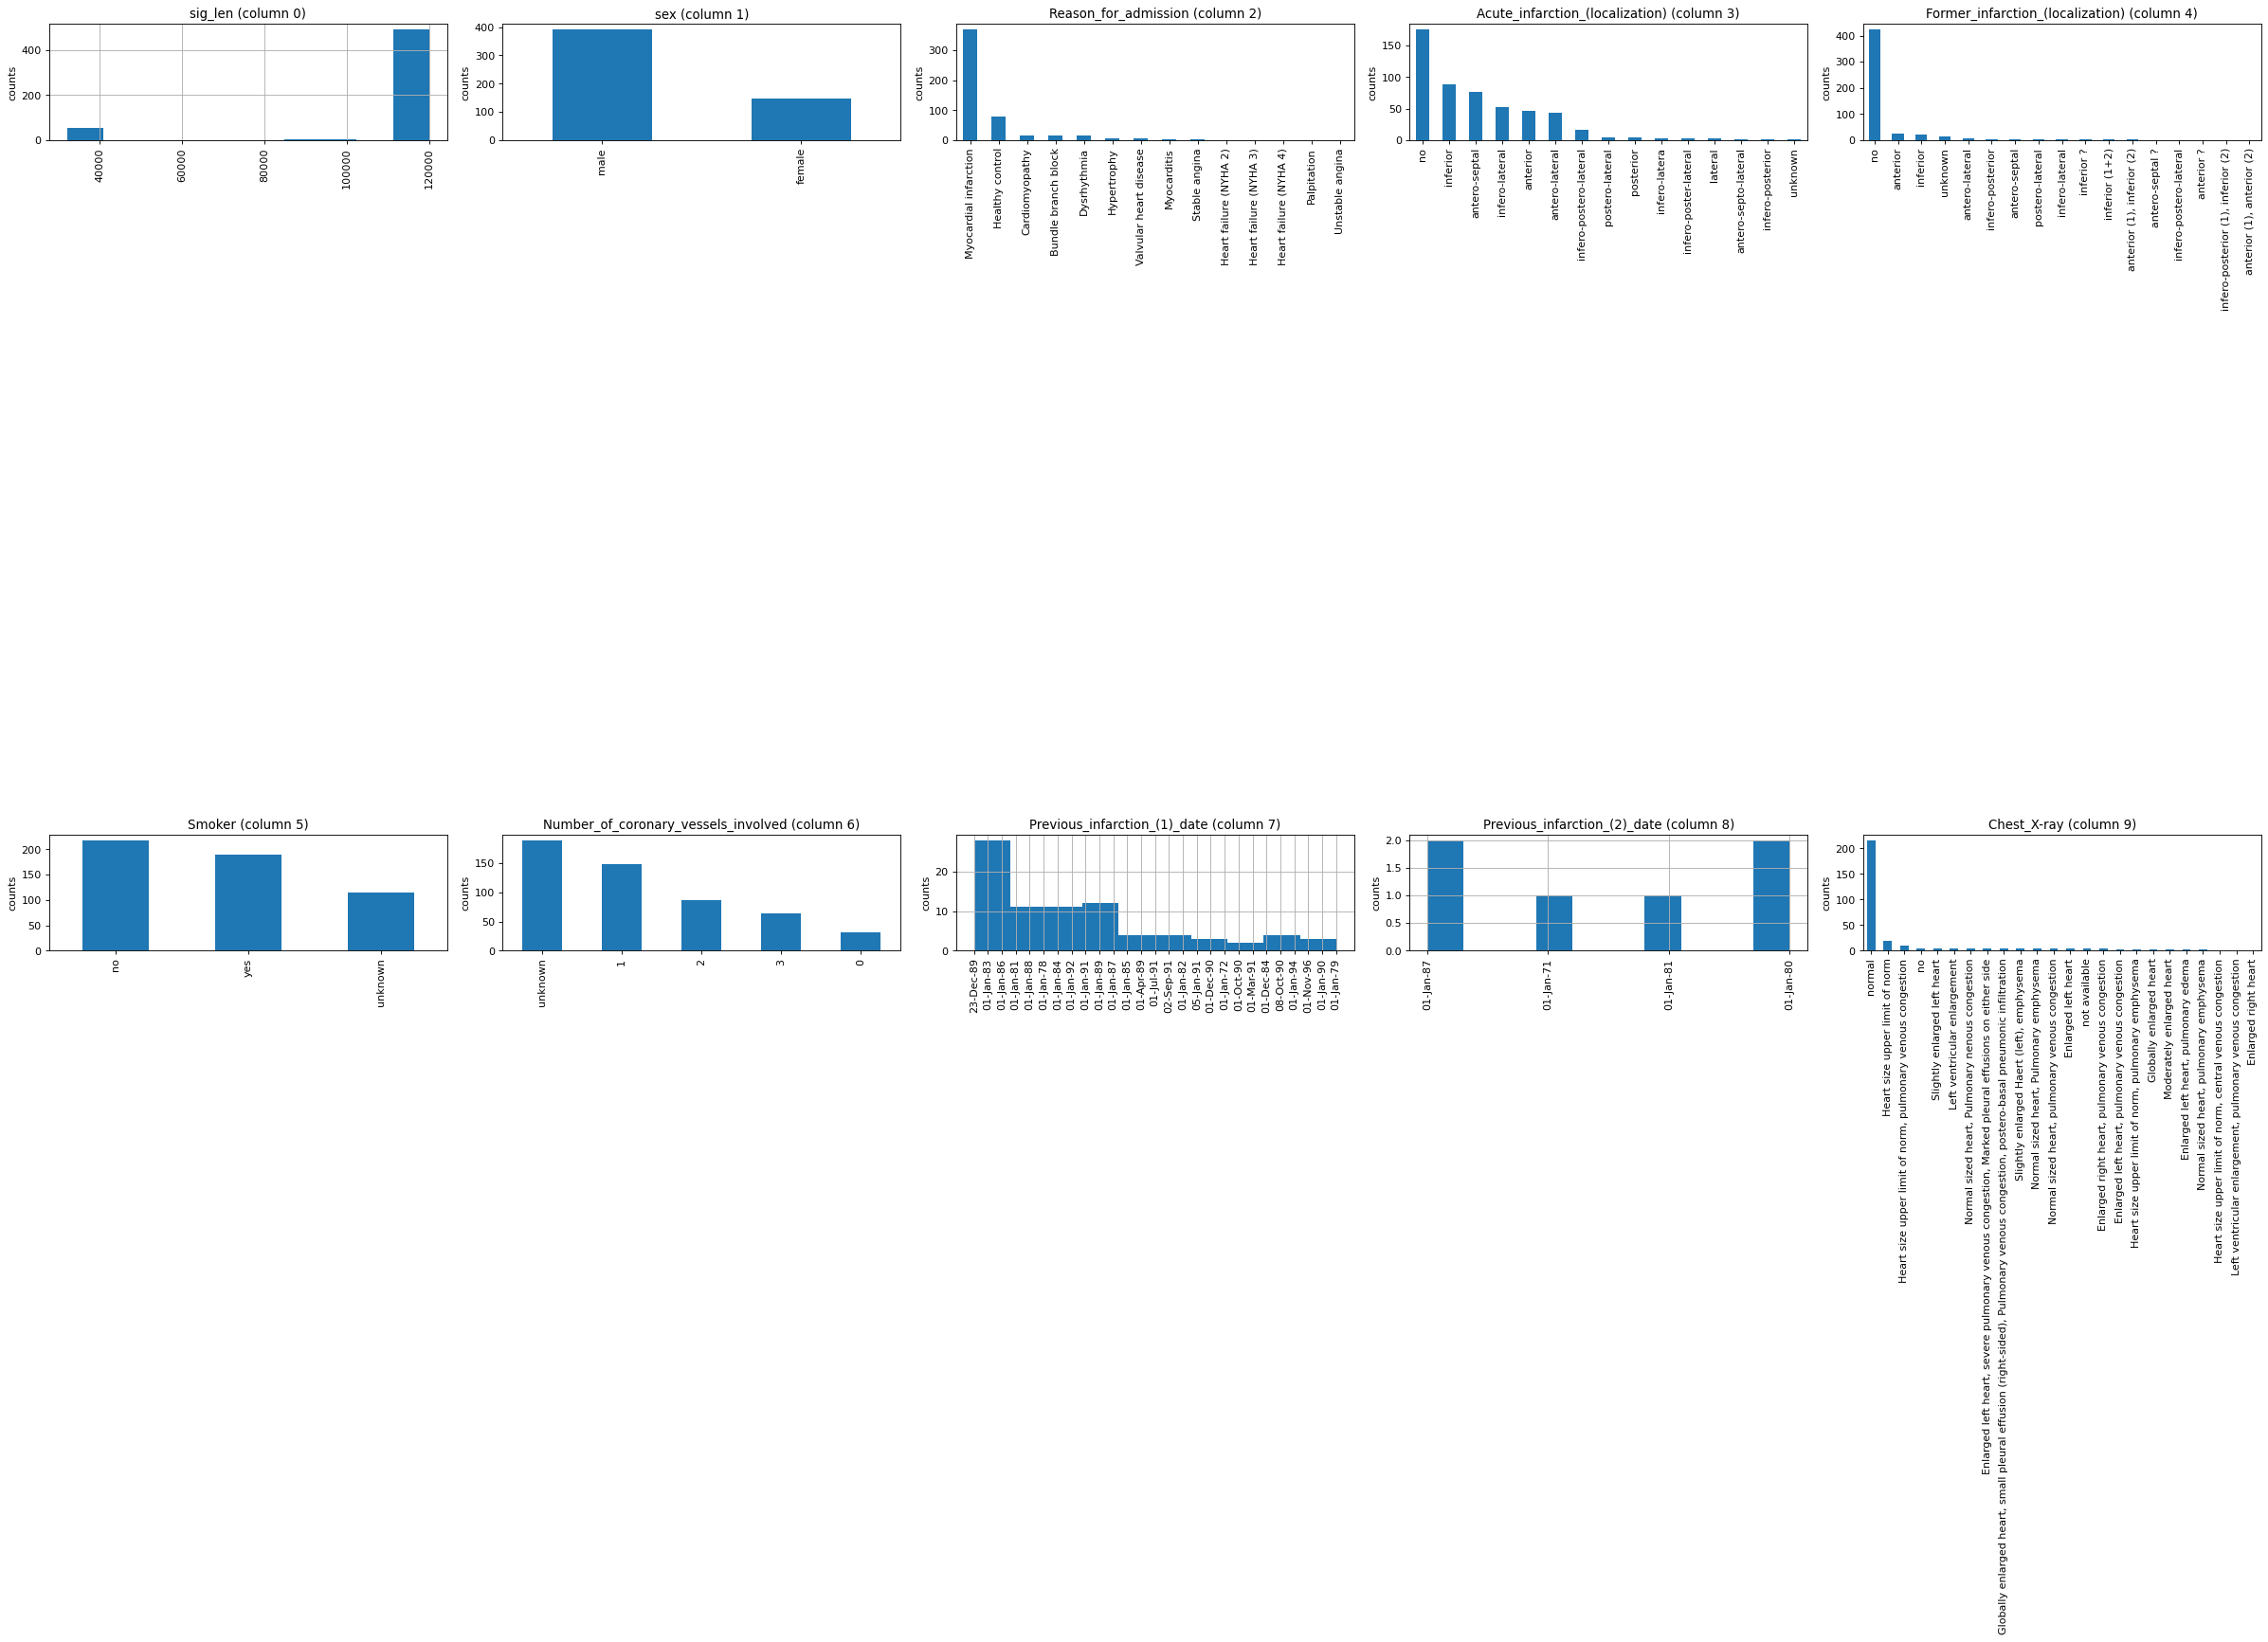

In [9]:
plotPerColumnDistribution(df1, 10, 5)

In [13]:
plotCorrelationMatrix(df1, 8)

NameError: name 'plotCorrelationMatrix' is not defined

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_16396/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


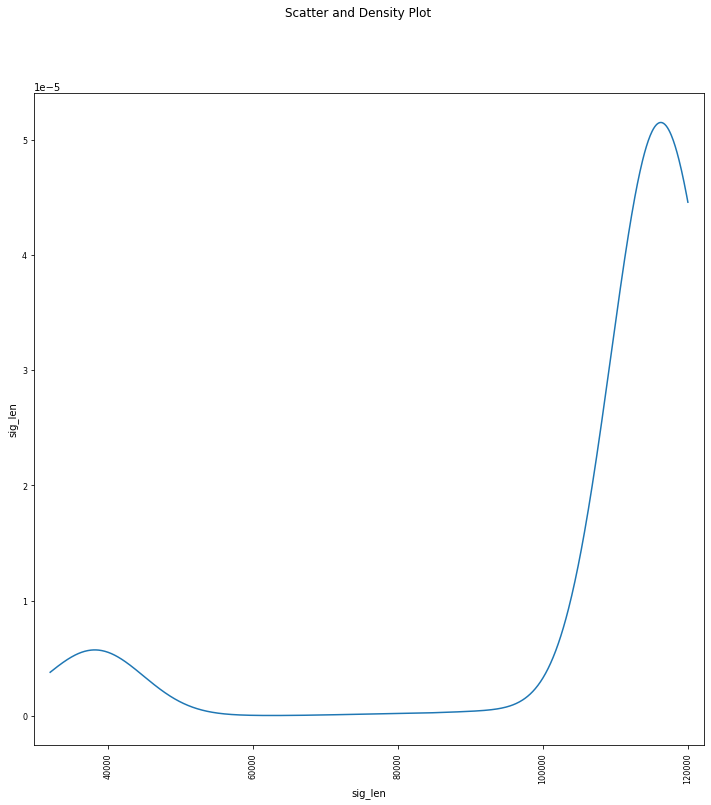

In [11]:
plotScatterMatrix(df1, 12, 10)